# 1. Import Libraries & Data

In [1]:
# general imports that we will need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set()

# data partition
from sklearn.model_selection import train_test_split

# filter methods
# - spearman 
# - chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import PredefinedSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error, root_mean_squared_error, mean_absolute_percentage_error
# embedded methods
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
# Scaler
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    RobustScaler
)

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Custom functions and variables
from functions import histogram_boxplot, labeled_barplot, stacked_barplot, distribution_plot_wrt_target, comparative_boxplot, comparative_barplot, detect_outliers_iqr
from vocab_prep import BRAND_MODEL_VOCAB

#set random seed for reproducibility
RSEED = 42
np.random.seed(RSEED)
pd.set_option('display.max_rows', 500)


#### Data Loading

In [4]:
train = pd.read_csv('train_data_EDA.csv')

test = pd.read_csv('test_data_EDA.csv')

In [5]:
train.head()

,carID,Brand,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage,carAge
0,0,audi,a3,10990,manual,57097.0,diesel,0.0,83.1,1.6,75.0,4.0,0.0,9.0
1,1,audi,a7,22999,semi-auto,24337.0,diesel,150.0,55.4,3.0,31.0,0.0,0.0,8.0
2,2,audi,a4,14242,manual,14900.0,petrol,125.0,53.3,1.4,65.0,4.0,0.0,9.0
3,3,audi,q3,15998,manual,37151.0,petrol,145.0,51.4,1.4,55.0,1.0,0.0,8.0
4,4,audi,a6,30850,automatic,4553.0,diesel,145.0,47.9,2.0,62.0,0.0,0.0,6.0


# 2. Train-Test Split

**Holdout Method**

In [ ]:
# Split the DataFrame into features (X) and target variable (y)
X = train_encoded.drop('price', axis=1) 
y = train_encoded['price']  

In [ ]:
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0) 

# 3. Feature Engineering

## 3.1 Encoding

Categorical Variables = "Brand","model","transmission","fuelType", but since we have already encoded "Brand", "transmission" and "fueltype", only "model" lefts

***model***

In [ ]:
X_train['model'].value_counts()

model
focus                    5549
c class                  4212
fiesta                   3613
golf                     2650
corsa                    1868
polo                     1781
astra                    1501
a class                  1385
3 series                 1377
unknown                  1208
kuga                     1190
yaris                    1145
mokka x                  1130
aygo                     1104
1 series                 1102
e class                  1063
a3                       1023
tiguan                    983
fabia                     857
octavia                   813
q3                        788
a4                        744
a1                        727
tucson                    722
2 series                  672
ecosport                  647
insignia                  585
i10                       579
5 series                  568
4 series                  529
glc class                 526
passat                    513
up                        488
a5  

In [ ]:
# Compute mean engineSize per model
tmp = X_train[['model', 'engineSize']].copy()
model_mean_engine = tmp.groupby('model')['engineSize'].mean()

# Compute global mean (fallback for unseen models)
global_mean_engine = X_train['engineSize'].mean()

def encoding_model(input_df):

    # Apply encoding
    input_df['model_te'] = input_df['model'].map(model_mean_engine).fillna(global_mean_engine)

    # Drop the original 'model' column to avoid redundancy
    input_df.drop(columns=['model'], inplace=True)

    return input_df


In [ ]:
X_train = encoding_model(X_train)

X_val = encoding_model(X_val)

test_encoded = encoding_model(test_encoded)

In [ ]:
X_train.sample(10)

,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,carAge,Brand_audi,Brand_bmw,Brand_ford,...,Brand_volkswagen,transmission_automatic,transmission_manual,transmission_semi-auto,fuelType_diesel,fuelType_electric,fuelType_hybrid,fuelType_petrol,hasDamage,model_te
carID,,,,,,,,,,,,,,,,,,,,,
20503,22704,200,44.8,2.0,81,0,9,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.010256
56992,13525,<NA>,39.2,1.4,96,2,6,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.444476
30832,100000,20,70.6,2.0,32,0,9,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.374155
51796,5810,135,74.3,1.8,84,0,7,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.665406
16933,13718,145,35.3,1.5,83,3,6,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.819975
44304,40,145,65.7,2.0,96,1,6,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.268558
35134,9762,145,67.3,1.5,73,0,6,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.659220
41353,27993,145,65.7,2.0,31,4,8,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.268558
10274,72910,20,68.9,2.0,63,2,11,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.890085


In [ ]:
X_val.sample(10)

,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,carAge,Brand_audi,Brand_bmw,Brand_ford,...,Brand_volkswagen,transmission_automatic,transmission_manual,transmission_semi-auto,fuelType_diesel,fuelType_electric,fuelType_hybrid,fuelType_petrol,hasDamage,model_te
carID,,,,,,,,,,,,,,,,,,,,,
51458,34885,0,85.6,1.8,<NA>,0,8,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.777402
46418,50,145,47.1,2.0,88,0,6,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.636582
52716,21755,135,74.3,1.8,45,3,7,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.665406
15058,7380,145,55.4,1.0,90,2,7,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.106611
71577,22981,145,60.1,2.0,44,4,8,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.672114
70023,42727,20,58.9,1.0,97,3,8,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.162495
58737,12388,145,50.4,1.5,77,3,6,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.741489
69044,14708,150,48.7,1.0,76,4,6,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.162495
29894,44000,299,50.4,1.2,84,3,14,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.106611


## 3.2 Missing Values

In [ ]:
X_train.isna().sum()

mileage                   1455
tax                       6647
mpg                       6400
engineSize                1438
paintQuality%             1794
previousOwners            1826
carAge                    1191
Brand_audi                   0
Brand_bmw                    0
Brand_ford                   0
Brand_hyundai                0
Brand_mercedes-benz          0
Brand_opel                   0
Brand_skoda                  0
Brand_toyota                 0
Brand_unknown                0
Brand_volkswagen             0
transmission_automatic       0
transmission_manual          0
transmission_semi-auto       0
fuelType_diesel              0
fuelType_electric            0
fuelType_hybrid              0
fuelType_petrol              0
hasDamage                 1233
model_te                     0
dtype: int64

### 2.1 Dealing with Missing Values

previousOwners

In [ ]:
X_train['previousOwners'] = X_train['previousOwners'].fillna(0)
X_val['previousOwners'] = X_val['previousOwners'].fillna(0)
test_encoded['previousOwners'] = test_encoded['previousOwners'].fillna(0)

In [ ]:
X_train['previousOwners'].unique()

<IntegerArray>
[4, 2, 0, 1, 3]
Length: 5, dtype: Int64

hasDamage

In [ ]:
X_train['hasDamage']=X_train['hasDamage'].fillna(0)
X_val['hasDamage'] = X_val['hasDamage'].fillna(0)
test_encoded['hasDamage'] = test_encoded['hasDamage'].fillna(0)

In [ ]:
X_train['hasDamage'].unique()

array([0.])

engineSize

In [ ]:
X_train['engineSize'].unique()

array([1.        , 1.2       , 1.5       , 1.6       , 2.        ,
       2.1       , 1.4       , 1.8       ,        nan, 4.4       ,
       3.        , 1.7       , 1.3       , 2.2       , 0.16286595,
       2.3       , 4.        , 0.7395339 , 0.19146242, 3.72371217,
       0.37112737, 1.1       , 6.2       , 2.5       , 2.61964142,
       2.63120047, 0.30707394, 4.3       , 4.2       , 0.18642488,
       2.06411863, 2.6631132 , 1.9       , 2.9       , 5.5       ,
       2.98579344, 5.        , 0.15452932, 2.4       , 3.82275785,
       2.8       , 5.2       , 3.73923548, 3.2       , 4.7       ,
       0.31340658, 2.78177621, 3.5       , 0.6       , 6.6       ,
       2.7       , 2.6       , 4.5       , 6.        , 3.6       ,
       5.4       ])

In [ ]:
# Compute median engineSize per model 
engine_median_by_model = (
    X_train.groupby('model_te')['engineSize']
           .median()
)

global_median_engine = X_train['engineSize'].median() 

def impute_engine_size(df, per_model_median, global_median_engine):
    df['engineSize'] = (
        df['engineSize']
          .fillna(df['model_te'].map(per_model_median))
          .fillna(global_median_engine)
    )
    return df


In [ ]:
# Fill NaN values in TRAIN using the per-model median
X_train  = impute_engine_size(X_train,  engine_median_by_model, global_median_engine)
# Fill NaN values in VAL using the same medians learned from TRAIN
X_val = impute_engine_size(X_val, engine_median_by_model, global_median_engine)

test_encoded = impute_engine_size(test_encoded, engine_median_by_model, global_median_engine)

In [ ]:
X_train.isna().sum()

mileage                   1455
tax                       6647
mpg                       6400
engineSize                   0
paintQuality%             1794
previousOwners               0
carAge                    1191
Brand_audi                   0
Brand_bmw                    0
Brand_ford                   0
Brand_hyundai                0
Brand_mercedes-benz          0
Brand_opel                   0
Brand_skoda                  0
Brand_toyota                 0
Brand_unknown                0
Brand_volkswagen             0
transmission_automatic       0
transmission_manual          0
transmission_semi-auto       0
fuelType_diesel              0
fuelType_electric            0
fuelType_hybrid              0
fuelType_petrol              0
hasDamage                    0
model_te                     0
dtype: int64

carAge

In [ ]:
# Compute median carAge per model (using TRAIN only)
carAge_median_by_model = (
    X_train.groupby('model_te')['carAge']
    .median()
)

global_median_carAge = X_train['carAge'].median() 

def impute_carAge(df, per_model_median, global_median_carAge):
    
    df['carAge'] = df.apply(
    lambda row: carAge_median_by_model[row['model_te']]
    if pd.isna(row['carAge']) and row['model_te'] in carAge_median_by_model
    else row['carAge'],
    axis=1)

    return df


In [ ]:
# Fill NaN values in TRAIN using the per-model median
X_train  = impute_carAge(X_train, carAge_median_by_model, global_median_carAge)
# Fill NaN values in VAL using the same medians learned from TRAIN
X_val = impute_carAge(X_val, carAge_median_by_model, global_median_carAge)

test_encoded = impute_carAge(test_encoded, carAge_median_by_model, global_median_carAge)

mileage

In [ ]:
mileage_median_by_age = (
    X_train.groupby('carAge')['mileage']
    .median()
)

def impute_mileage(df, per_model_median):

    df['mileage'] = df.apply(
        lambda row: mileage_median_by_age[row['carAge']]
        if pd.isna(row['mileage']) and row['carAge'] in mileage_median_by_age
        else row['mileage'],
        axis=1)
    
    return df


In [ ]:
X_train  = impute_mileage(X_train, mileage_median_by_age)
# Fill NaN values in VAL using the same medians learned from TRAIN
X_val = impute_mileage(X_val, mileage_median_by_age)

test_encoded = impute_mileage(test_encoded, mileage_median_by_age)

In [ ]:
X_train.isna().sum()

mileage                      0
tax                       6647
mpg                       6400
engineSize                   0
paintQuality%             1794
previousOwners               0
carAge                       0
Brand_audi                   0
Brand_bmw                    0
Brand_ford                   0
Brand_hyundai                0
Brand_mercedes-benz          0
Brand_opel                   0
Brand_skoda                  0
Brand_toyota                 0
Brand_unknown                0
Brand_volkswagen             0
transmission_automatic       0
transmission_manual          0
transmission_semi-auto       0
fuelType_diesel              0
fuelType_electric            0
fuelType_hybrid              0
fuelType_petrol              0
hasDamage                    0
model_te                     0
dtype: int64

paintQuality%

In [ ]:
# Compute median paintQuality% per carAge (using TRAIN only)
paintQuality_median_by_age = (
    X_train.groupby('carAge')['paintQuality%']
    .median()
)

def impute_paintQuality(df, per_model_median):

    df['paintQuality%'] = df.apply(
    lambda row: paintQuality_median_by_age[row['carAge']]
    if pd.isna(row['paintQuality%']) and row['carAge'] in paintQuality_median_by_age
    else row['paintQuality%'],
    axis=1)
    
    return df

In [ ]:
X_train  = impute_paintQuality(X_train, paintQuality_median_by_age)
# Fill NaN values in VAL using the same medians learned from TRAIN
X_val = impute_paintQuality(X_val, paintQuality_median_by_age)

test_encoded = impute_paintQuality(test_encoded, paintQuality_median_by_age)

In [ ]:
X_train.isna().sum()

mileage                      0
tax                       6647
mpg                       6400
engineSize                   0
paintQuality%                0
previousOwners               0
carAge                       0
Brand_audi                   0
Brand_bmw                    0
Brand_ford                   0
Brand_hyundai                0
Brand_mercedes-benz          0
Brand_opel                   0
Brand_skoda                  0
Brand_toyota                 0
Brand_unknown                0
Brand_volkswagen             0
transmission_automatic       0
transmission_manual          0
transmission_semi-auto       0
fuelType_diesel              0
fuelType_electric            0
fuelType_hybrid              0
fuelType_petrol              0
hasDamage                    0
model_te                     0
dtype: int64

tax

In [ ]:
# Compute median tax per model (using TRAIN only)
tax_median_by_model = (
    X_train.groupby('model_te')['tax']
    .median()
)

def impute_tax(df, per_model_median):
   
   df['tax'] = df.apply(
    lambda row: tax_median_by_model[row['model_te']]
    if pd.isna(row['tax']) and row['model_te'] in tax_median_by_model
    else row['tax'],
    axis=1)
    
   return df

In [ ]:
X_train  = impute_tax(X_train, tax_median_by_model)
# Fill NaN values in VAL using the same medians learned from TRAIN
X_val = impute_tax(X_val, tax_median_by_model)

test_encoded = impute_tax(test_encoded, tax_median_by_model)

In [ ]:
X_train.isna().sum()

mileage                      0
tax                          0
mpg                       6247
engineSize                   0
paintQuality%                0
previousOwners               0
carAge                       0
Brand_audi                   0
Brand_bmw                    0
Brand_ford                   0
Brand_hyundai                0
Brand_mercedes-benz          0
Brand_opel                   0
Brand_skoda                  0
Brand_toyota                 0
Brand_volkswagen             0
transmission_automatic       0
transmission_manual          0
transmission_semi-auto       0
fuelType_diesel              0
fuelType_electric            0
fuelType_hybrid              0
fuelType_petrol              0
hasDamage                    0
model_te                     0
dtype: int64

mpg

In [ ]:
# Compute median mpg per model (using TRAIN only)
mpg_median_by_model = (
    X_train.groupby('model_te')['mpg']
    .median()
)

def impute_mpg(df, per_model_median):
   
   df['mpg'] = df.apply(
    lambda row: mpg_median_by_model[row['model_te']]
    if pd.isna(row['mpg']) and row['model_te'] in mpg_median_by_model
    else row['mpg'],
    axis=1)
    
   return df

In [ ]:
X_train  = impute_mpg(X_train, mpg_median_by_model)
# Fill NaN values in VAL using the same medians learned from TRAIN
X_val = impute_mpg(X_val, mpg_median_by_model)

test_encoded = impute_mpg(test_encoded, mpg_median_by_model)

In [ ]:
X_train.isna().sum()

mileage                   0
tax                       0
mpg                       0
engineSize                0
paintQuality%             0
previousOwners            0
carAge                    0
Brand_audi                0
Brand_bmw                 0
Brand_ford                0
Brand_hyundai             0
Brand_mercedes-benz       0
Brand_opel                0
Brand_skoda               0
Brand_toyota              0
Brand_volkswagen          0
transmission_automatic    0
transmission_manual       0
transmission_semi-auto    0
fuelType_diesel           0
fuelType_electric         0
fuelType_hybrid           0
fuelType_petrol           0
hasDamage                 0
model_te                  0
dtype: int64

## 3.3 Outliers

### Outlier detection

Column: mileage - Number of Outliers: 2639
Column: mileage - % of Outliers: 4.44%



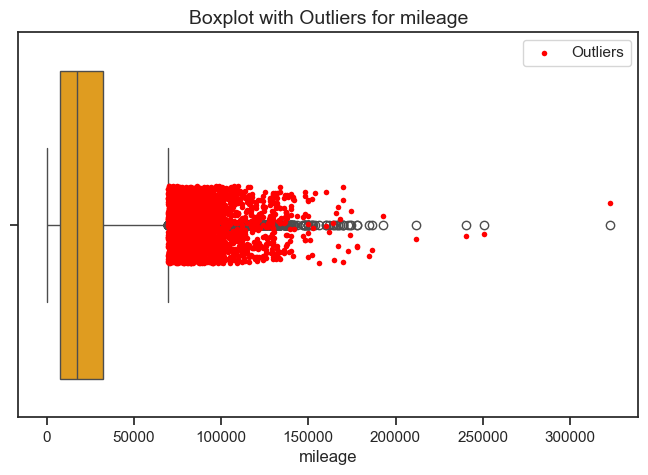

Column: tax - Number of Outliers: 15664
Column: tax - % of Outliers: 26.37%



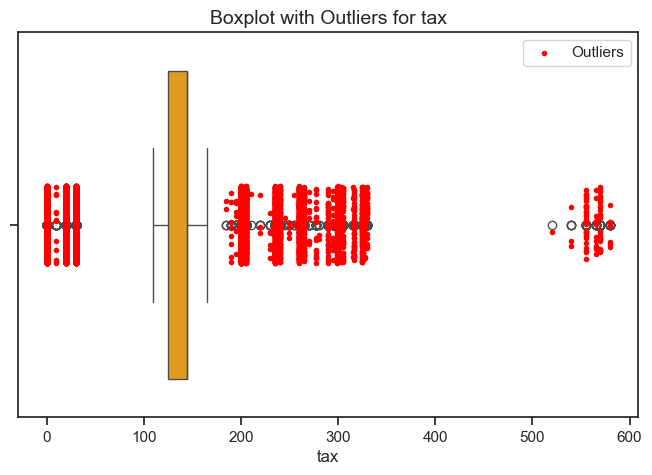

Column: mpg - Number of Outliers: 1374
Column: mpg - % of Outliers: 2.31%



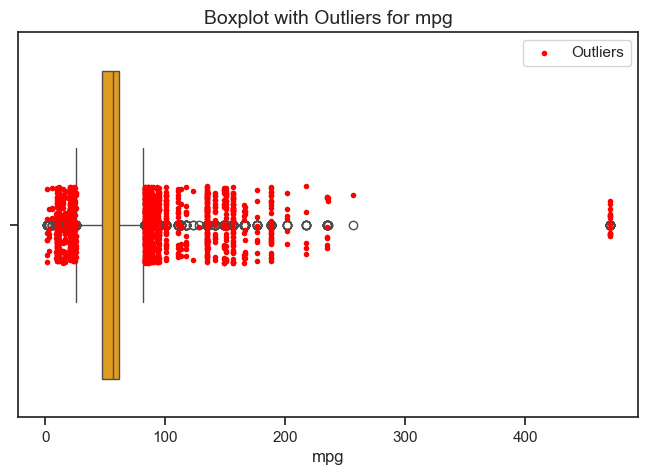

Column: engineSize - Number of Outliers: 503
Column: engineSize - % of Outliers: 0.85%



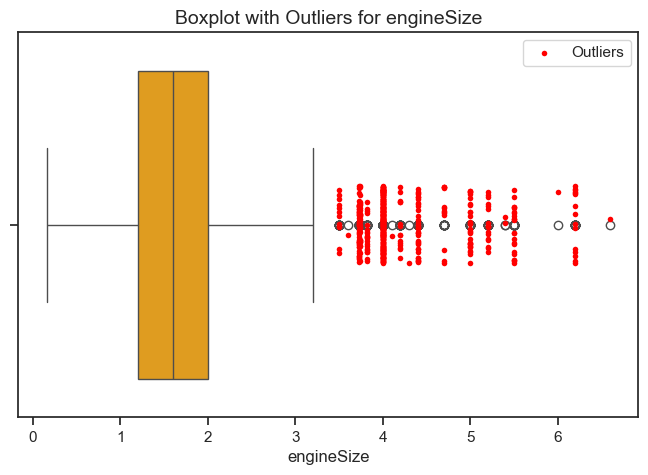

Column: paintQuality% - Number of Outliers: 0
Column: paintQuality% - % of Outliers: 0.00%



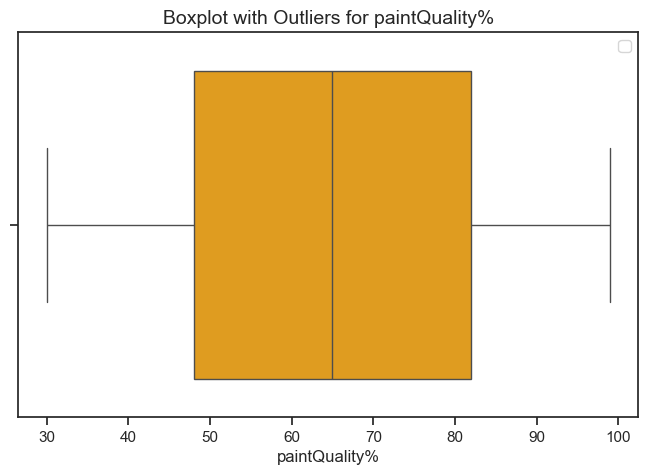

Column: previousOwners - Number of Outliers: 0
Column: previousOwners - % of Outliers: 0.00%



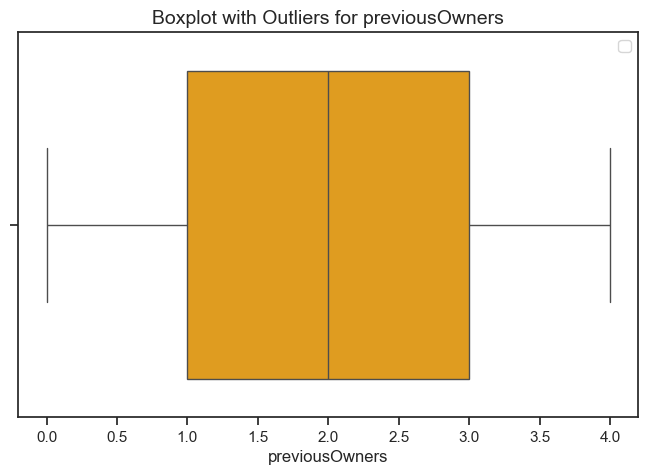

Column: carAge - Number of Outliers: 1435
Column: carAge - % of Outliers: 2.42%



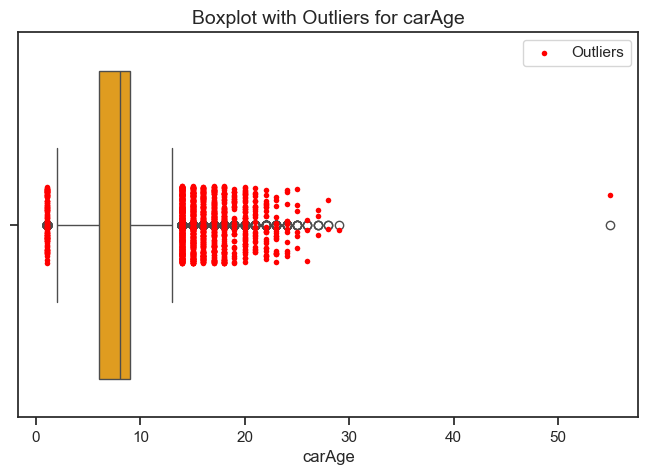

,Column,Num_Outliers,Pct_Outliers
0,mileage,2639,4.442611
1,tax,15664,26.369483
2,mpg,1374,2.313053
3,engineSize,503,0.846773
4,carAge,1435,2.415744


In [ ]:
detect_outliers_iqr(X_train[['mileage','tax','mpg','engineSize','paintQuality%','previousOwners','carAge']], threshold=0.001)

### Dealing with outliers

***mileage***

In [ ]:
X_train[X_train['mileage'] > 250000]

,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,carAge,Brand_audi,Brand_bmw,Brand_ford,...,Brand_volkswagen,transmission_automatic,transmission_manual,transmission_semi-auto,fuelType_diesel,fuelType_electric,fuelType_hybrid,fuelType_petrol,hasDamage,model_te
carID,,,,,,,,,,,,,,,,,,,,,
4692,323000.0,200.0,44.1,2.0,74.0,1,17.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.209209
48042,250650.0,125.0,57.6,1.9,62.0,1,15.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.636390


Since having more than 250000 miles in 15+ years is completely possible, we will not treat them as wrong values

***tax***

In [ ]:
X_train[X_train['tax'] == 0]

,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,carAge,Brand_audi,Brand_bmw,Brand_ford,...,Brand_volkswagen,transmission_automatic,transmission_manual,transmission_semi-auto,fuelType_diesel,fuelType_electric,fuelType_hybrid,fuelType_petrol,hasDamage,model_te
carID,,,,,,,,,,,,,,,,,,,,,
15548,21523.0,0.0,65.7,1.0,55.0,3,8.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.104875
17770,58665.0,0.0,74.3,1.5,96.0,0,9.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.370720
28070,17490.0,0.0,78.5,1.6,57.0,2,12.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.104875
64677,29840.0,0.0,83.1,1.2,85.0,0,9.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.363558
55623,31455.0,0.0,74.3,1.8,65.0,0,8.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.661248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53194,49731.0,0.0,78.0,1.5,51.0,0,8.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.421867
51859,10302.0,0.0,69.0,1.0,76.0,4,9.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.999428
28010,30923.0,0.0,74.3,1.5,96.0,2,9.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.370720


In [ ]:
X_train.loc[(X_train['tax'] == 0) & (X_train['fuelType_electric'] == 1)].shape[0]

3

Since we have a lot of tax values (3371) = 0 and we do not know the specific laws of the country about the car taxes, we can't assume that those values are incorrect.

In [ ]:
X_train[X_train['tax'] > 500].sample(20)

,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,carAge,Brand_audi,Brand_bmw,Brand_ford,...,Brand_volkswagen,transmission_automatic,transmission_manual,transmission_semi-auto,fuelType_diesel,fuelType_electric,fuelType_hybrid,fuelType_petrol,hasDamage,model_te
carID,,,,,,,,,,,,,,,,,,,,,
72112,99906.0,570.0,26.2,3.2,60.0,1,17.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.669579
40894,55206.0,555.0,51.4,4.7,91.0,0,11.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.004227
54636,113000.0,555.0,31.4,3.0,91.0,0,19.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.857143
45321,19562.0,570.0,57.7,6.2,57.0,4,11.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.035515
288,28359.0,565.0,26.4,4.2,37.0,4,12.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.062500
13819,49000.0,570.0,25.4,3.0,98.0,4,9.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.981346
921,58000.0,555.0,28.8,4.0,89.0,2,11.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.000000
35117,39000.0,570.0,23.5,6.2,36.0,1,12.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.035515
8419,26000.0,565.0,28.5,4.4,34.0,2,9.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4.400000


Since all cars with tax values higher than 500 either have "large" engine sizes, are "old," or are combustion-engine, which are usually factors that contribute to a higher tax values for cars, we will not consider these values ​​as outliers.

***mpg***

In [ ]:
X_train[X_train['mpg']>400]

,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,carAge,Brand_audi,Brand_bmw,Brand_ford,...,Brand_volkswagen,transmission_automatic,transmission_manual,transmission_semi-auto,fuelType_diesel,fuelType_electric,fuelType_hybrid,fuelType_petrol,hasDamage,model_te
carID,,,,,,,,,,,,,,,,,,,,,
10133,22336.0,0.0,470.8,0.6,95.0,4,8.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.6
9815,20013.0,0.0,470.8,0.6,30.0,0,9.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.6
8993,9990.0,0.0,470.8,0.6,44.0,0,9.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.6
13075,33931.0,0.0,470.8,0.6,31.0,4,10.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.6
9737,34539.0,0.0,470.8,0.6,42.0,0,11.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.6
12853,10839.0,0.0,470.8,0.6,31.0,4,8.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.6
13378,9886.0,0.0,470.8,0.6,44.0,0,10.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.6
14531,36429.0,0.0,470.8,0.6,30.0,2,8.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.6
9196,19995.0,0.0,470.8,0.6,79.0,3,9.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.6


Since every car with > 400 mpg have the same brand and model, we do not consider those values as wrong values

***engineSize***

In [ ]:
X_train[X_train['engineSize']>6]

,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,carAge,Brand_audi,Brand_bmw,Brand_ford,...,Brand_volkswagen,transmission_automatic,transmission_manual,transmission_semi-auto,fuelType_diesel,fuelType_electric,fuelType_hybrid,fuelType_petrol,hasDamage,model_te
carID,,,,,,,,,,,,,,,,,,,,,
43725,24175.0,570.0,23.5,6.2,86.0,1,11.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.035515
46372,49964.0,145.0,23.0,6.2,78.0,3,12.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.035515
46536,44000.0,145.0,57.7,6.2,88.0,2,12.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.035515
35117,39000.0,570.0,23.5,6.2,36.0,1,12.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.035515
44794,37000.0,570.0,23.5,6.2,92.0,2,11.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.035515
36196,86706.0,145.0,57.7,6.2,31.0,0,11.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.035515
35612,50475.0,570.0,23.5,6.2,44.0,2,12.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.035515
45321,19562.0,570.0,57.7,6.2,57.0,4,11.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.035515
35538,49964.0,326.0,57.7,6.2,58.0,3,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.035515


Since all the cars with engineSize > 6 are all from the same brand (almost all from the same model) we will not considerer those values as wrong values

***carAge***

In [ ]:
X_train[X_train['carAge']>50]

,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,carAge,Brand_audi,Brand_bmw,Brand_ford,...,Brand_volkswagen,transmission_automatic,transmission_manual,transmission_semi-auto,fuelType_diesel,fuelType_electric,fuelType_hybrid,fuelType_petrol,hasDamage,model_te
carID,,,,,,,,,,,,,,,,,,,,,
62732,37357.0,200.0,42.2,1.4,60.0,2,55.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.501375


In [ ]:
# --- aprender no TRAIN ---
carAge_median_by_model = X_train.groupby('model_te')['carAge'].median()
global_median_carAge   = float(X_train['carAge'].median())  # fallback

def replace_carAge_outliers(df, per_model_median, thr=50, global_med=None, to_int=True):
    out = df.copy()
    s = pd.to_numeric(out['carAge'], errors='coerce').astype('Float64')
    mask = s > thr

    # replace median by model
    repl = out.loc[mask, 'model_te'].map(per_model_median)
    if global_med is not None:
        repl = repl.fillna(global_med)

    s.loc[mask] = repl
    if to_int:
        s = s.round().astype('Int64') 
    out['carAge'] = s
    return out



In [ ]:
X_train = replace_carAge_outliers(X_train, carAge_median_by_model, thr=50, global_med=global_median_carAge)
X_val = replace_carAge_outliers(X_val, carAge_median_by_model, thr=50, global_med=global_median_carAge)
test_encoded = replace_carAge_outliers(test_encoded, carAge_median_by_model, thr=50, global_med=global_median_carAge)

## 3.4 Scaling

We are going to use the "RobustScaler"

In [ ]:
# Initialize the scaler
scaler = RobustScaler()

In [ ]:
num = ['mileage', 'engineSize', 'tax', 'mpg', 'carAge', 'paintQuality%','previousOwners','model_te']

In [ ]:
# Fit the scaler only on TRAIN data
scaler.fit(X_train[num])

# Transform both TRAIN and VALIDATION sets
X_train[num] = scaler.transform(X_train[num])
X_val[num] = scaler.transform(X_val[num])
test_encoded[num] = scaler.transform(test_encoded[num])

In [ ]:
print(X_train[num].describe())

            mileage    engineSize           tax           mpg        carAge  \
count  59402.000000  59402.000000  59402.000000  59402.000000  59402.000000   
mean       0.235481      0.080459     -1.070912     -0.065214     -0.031295   
std        0.867808      0.703737      3.063473      1.061719      0.727531   
min       -0.706646     -1.806838     -7.250000     -3.874126     -2.333333   
25%       -0.400689     -0.500000     -1.000000     -0.657343     -0.666667   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.599311      0.500000      0.000000      0.342657      0.333333   
max       12.308455      6.250000     21.750000     28.972028      7.000000   

       paintQuality%  previousOwners      model_te  
count   59402.000000    59402.000000  59402.000000  
mean       -0.011703       -0.032634      0.025034  
std         0.586581        0.718092      0.722542  
min        -1.029412       -1.000000     -1.679526  
25%        -0.500000   

# 4.Feature Selection

In [ ]:
X_train.columns

Index(['mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%',
       'previousOwners', 'carAge', 'Brand_audi', 'Brand_bmw', 'Brand_ford',
       'Brand_hyundai', 'Brand_mercedes-benz', 'Brand_opel', 'Brand_skoda',
       'Brand_toyota', 'Brand_volkswagen', 'transmission_automatic',
       'transmission_manual', 'transmission_semi-auto', 'fuelType_diesel',
       'fuelType_electric', 'fuelType_hybrid', 'fuelType_petrol', 'hasDamage',
       'model_te'],
      dtype='object')

In [ ]:
numeric = [
    'mileage',
    'tax',
    'mpg',
    'engineSize',
    'paintQuality%',
    'previousOwners',
    'carAge',
    'model_te'
]


In [ ]:
encoded_features = [
    'Brand_audi',
    'Brand_bmw',
    'Brand_ford',
    'Brand_hyundai',
    'Brand_mercedes-benz',
    'Brand_opel',
    'Brand_skoda',
    'Brand_toyota',
    'Brand_volkswagen',
    'transmission_automatic',
    'transmission_manual',
    'transmission_semi-auto',
    'fuelType_diesel',
    'fuelType_electric',
    'fuelType_hybrid',
    'fuelType_petrol'
]


In [ ]:
binary_features = ['hasDamage']

In [ ]:
categ_features = encoded_features + binary_features 

all_features = numeric + categ_features

### 4.1 Filter-Based Methods

In [ ]:
X_train[numeric].var()

mileage           0.753090
tax               9.384866
mpg               1.127247
engineSize        0.495246
paintQuality%     0.344077
previousOwners    0.515656
carAge            0.529302
model_te          0.522067
dtype: float64

**Spearman Correlation Matrix**

In [ ]:
cor_spearman = X_train[numeric].corr(method ='spearman')
cor_spearman

,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,carAge,model_te
mileage,1.000000,-0.244978,0.301784,0.097276,-0.003313,0.002644,0.785879,0.033548
tax,-0.244978,1.000000,-0.522208,0.149133,0.001104,0.003428,-0.302600,0.164750
mpg,0.301784,-0.522208,1.000000,-0.189379,0.002843,-0.000045,0.285832,-0.241137
engineSize,0.097276,0.149133,-0.189379,1.000000,0.004904,0.005463,0.033774,0.817353
paintQuality%,-0.003313,0.001104,0.002843,0.004904,1.000000,-0.004081,-0.005166,0.003894
previousOwners,0.002644,0.003428,-0.000045,0.005463,-0.004081,1.000000,-0.001973,0.004776
carAge,0.785879,-0.302600,0.285832,0.033774,-0.005166,-0.001973,1.000000,-0.050616
model_te,0.033548,0.164750,-0.241137,0.817353,0.003894,0.004776,-0.050616,1.000000


In [ ]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = 'PiYG', fmt='.1')
    plt.show()

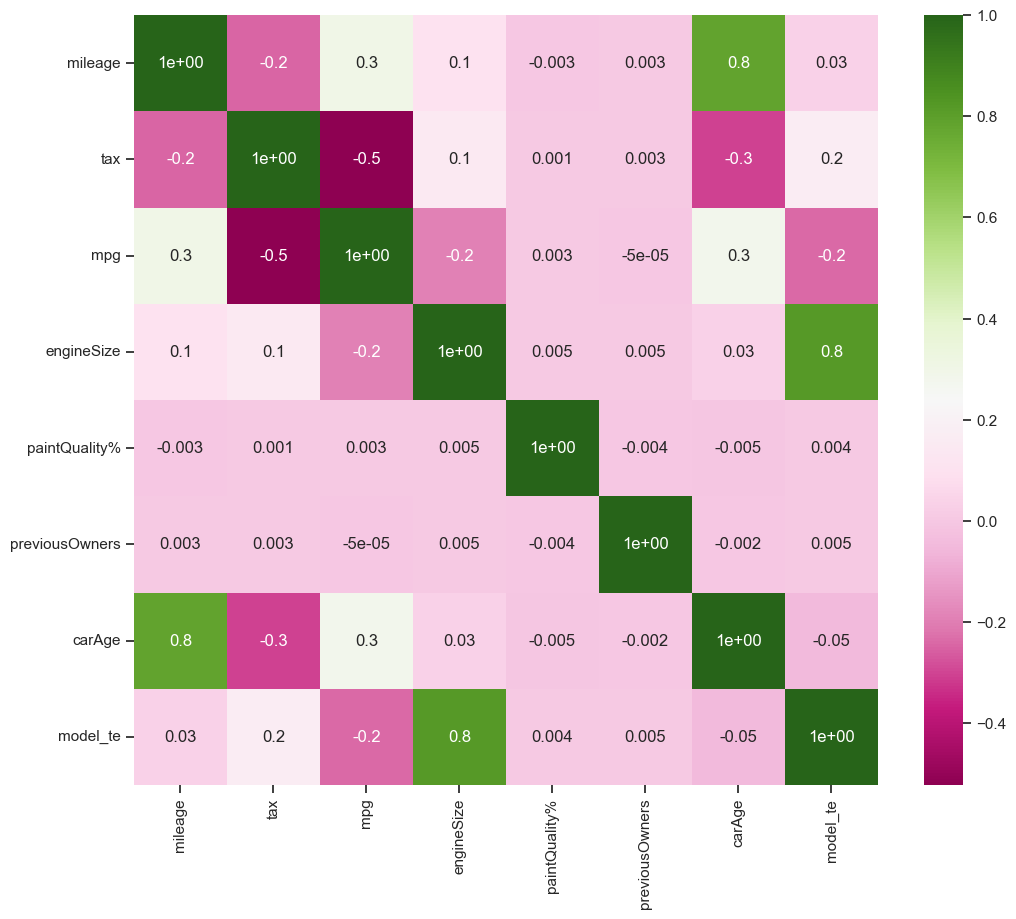

In [ ]:
cor_heatmap(cor_spearman)

**Chi Squared Test**

In [ ]:
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [ ]:
for var in encoded_features:
    TestIndependence(X_train[var], y_train, var)

Brand_audi is IMPORTANT for Prediction
Brand_bmw is IMPORTANT for Prediction
Brand_ford is IMPORTANT for Prediction
Brand_hyundai is NOT an important predictor. (Discard Brand_hyundai from model)
Brand_mercedes-benz is IMPORTANT for Prediction
Brand_opel is IMPORTANT for Prediction
Brand_skoda is NOT an important predictor. (Discard Brand_skoda from model)
Brand_toyota is IMPORTANT for Prediction
Brand_volkswagen is IMPORTANT for Prediction
transmission_automatic is IMPORTANT for Prediction
transmission_manual is IMPORTANT for Prediction
transmission_semi-auto is IMPORTANT for Prediction
fuelType_diesel is IMPORTANT for Prediction
fuelType_electric is NOT an important predictor. (Discard fuelType_electric from model)
fuelType_hybrid is IMPORTANT for Prediction
fuelType_petrol is IMPORTANT for Prediction


In [ ]:
X_train[X_train['Brand_hyundai'] == 1]

,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,carAge,Brand_audi,Brand_bmw,Brand_ford,...,Brand_volkswagen,transmission_automatic,transmission_manual,transmission_semi-auto,fuelType_diesel,fuelType_electric,fuelType_hybrid,fuelType_petrol,hasDamage,model_te
carID,,,,,,,,,,,,,,,,,,,,,
33397,0.586044,0.00,0.083916,0.125,0.882353,0.5,-0.333333,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.053789
32107,-0.585802,0.00,0.000000,-0.750,-0.676471,-0.5,-1.000000,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.906800
31959,0.017407,0.00,-1.510490,0.000,0.941176,-1.0,-0.666667,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.053789
31685,-0.636654,0.00,-1.482517,0.000,-0.441176,0.5,-0.666667,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.053789
34104,0.124550,0.25,1.244755,0.000,-0.117647,0.0,2.000000,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.261869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31580,0.245998,0.00,0.363636,0.125,-0.823529,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.053789
34420,-0.265017,0.00,-0.867133,-0.750,-0.205882,-1.0,-0.666667,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.874723
32625,-0.642215,0.00,-0.223776,-0.750,-0.235294,0.5,-1.000000,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.906800


In [ ]:
X_train[X_train['Brand_skoda'] == 1]

,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,carAge,Brand_audi,Brand_bmw,Brand_ford,...,Brand_volkswagen,transmission_automatic,transmission_manual,transmission_semi-auto,fuelType_diesel,fuelType_electric,fuelType_hybrid,fuelType_petrol,hasDamage,model_te
carID,,,,,,,,,,,,,,,,,,,,,
48531,0.139500,0.00,0.167832,-0.750,0.235294,-1.0,-0.333333,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.020221
51039,-0.211063,-6.25,0.538462,-0.750,-0.500000,-0.5,0.000000,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.055223
47556,-0.097190,0.25,0.538462,-0.750,0.735294,-1.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.900675
46997,-0.594546,0.00,-1.090909,-0.125,-0.529412,-1.0,-0.666667,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.295194
50238,-0.144295,0.00,-1.573427,-0.125,-0.176471,1.0,-0.666667,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.229365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51083,-0.180802,0.00,0.867133,0.000,0.176471,1.0,-0.666667,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.020221
51028,0.224118,0.00,0.440559,0.500,-0.882353,-1.0,0.000000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.020221
49131,-0.526247,0.00,0.251748,-0.750,-0.823529,-0.5,-0.666667,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.900675


In [ ]:
X_train[X_train['fuelType_electric'] == 1]

,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,carAge,Brand_audi,Brand_bmw,Brand_ford,...,Brand_volkswagen,transmission_automatic,transmission_manual,transmission_semi-auto,fuelType_diesel,fuelType_electric,fuelType_hybrid,fuelType_petrol,hasDamage,model_te
carID,,,,,,,,,,,,,,,,,,,,,
21931,0.281780,-7.25,0.755245,0.50,0.500000,1.0,0.333333,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.384093
64169,0.681905,-7.25,12.510490,-0.25,0.529412,-0.5,0.666667,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.398691
16306,-0.328078,-7.25,0.755245,0.50,-0.176471,0.5,0.333333,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.384093


### 4.2 Wrapper Methods

**RFE**

In [ ]:
estimator = RandomForestRegressor(n_estimators=200, random_state=0, n_jobs=-1)


selector = RFE(
    estimator=estimator,
    n_features_to_select=12,   
    step=1,
    verbose=1
)


selector.fit(X_train, y_train)


selected_features = X_train.columns[selector.support_]
print("Selected features:", selected_features)


y_pred = estimator.fit(X_train[selected_features], y_train).predict(X_val[selected_features])
print("Validation MAE:", mean_absolute_error(y_val, y_pred))

Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Selected features: Index(['mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%',
       'previousOwners', 'carAge', 'Brand_audi', 'Brand_bmw', 'Brand_ford',
       'transmission_manual', 'model_te'],
      dtype='object')
Validation MAE: 1322.7085665010534


Best k = 24 with Validation MAE = 1290.330
Selected features: ['model_te', 'carAge', 'engineSize', 'transmission_manual', 'mileage', 'mpg', 'tax', 'paintQuality%', 'Brand_audi', 'Brand_ford', 'previousOwners', 'Brand_bmw', 'Brand_volkswagen', 'Brand_mercedes-benz', 'fuelType_petrol', 'fuelType_diesel', 'transmission_semi-auto', 'transmission_automatic', 'Brand_skoda', 'Brand_opel', 'Brand_toyota', 'fuelType_hybrid', 'Brand_hyundai', 'fuelType_electric']


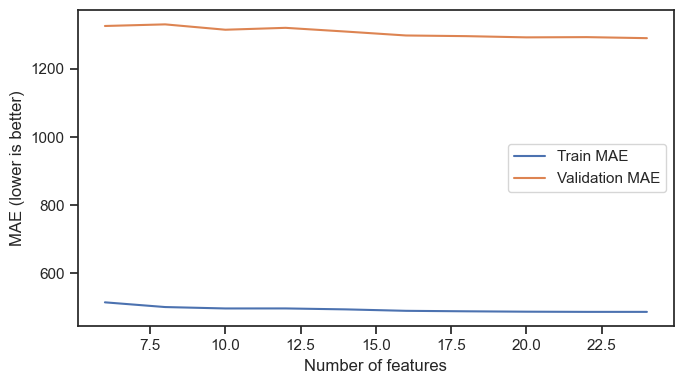

In [ ]:
# Base model (smaller n_estimators during selection to be fast)
ranker = RandomForestRegressor(
    n_estimators=150,      # smaller for speed; increase later for final model
    random_state=42,
    n_jobs=-1
)
ranker.fit(X_train, y_train)

# Feature ranking by impurity-based importance (fast)
importances = ranker.feature_importances_
sorted_idx = np.argsort(importances)[::-1]
sorted_feats = X_train.columns[sorted_idx]

# 2) Sweep top-k subsets (10–15 fits only)
k_grid = list(range(6, min(26, X_train.shape[1] + 1), 2))  # e.g., 6,8,...,24
train_mae, val_mae = [], []
best_k, best_mae, best_feats = None, np.inf, None

for k in k_grid:
    feats_k = list(sorted_feats[:k])
    model_k = RandomForestRegressor(
        n_estimators=150,   # keep it light for the sweep
        random_state=42,
        n_jobs=-1
    )
    model_k.fit(X_train[feats_k], y_train)
    y_tr = model_k.predict(X_train[feats_k])
    y_va = model_k.predict(X_val[feats_k])

    tr_mae = mean_absolute_error(y_train, y_tr)
    va_mae = mean_absolute_error(y_val, y_va)
    train_mae.append(tr_mae)
    val_mae.append(va_mae)

    if va_mae < best_mae:
        best_mae = va_mae
        best_k = k
        best_feats = feats_k

print(f"Best k = {best_k} with Validation MAE = {best_mae:.3f}")
print("Selected features:", best_feats)

# 3) Retrain a stronger final model on the chosen features
final_model = RandomForestRegressor(
    n_estimators=400,  # now you can increase for accuracy
    random_state=42,
    n_jobs=-1
)
final_model.fit(X_train[best_feats], y_train)




plt.figure(figsize=(7,4))
plt.plot(k_grid, train_mae, label="Train MAE")
plt.plot(k_grid, val_mae, label="Validation MAE")
plt.xlabel("Number of features")
plt.ylabel("MAE (lower is better)")
plt.legend()
plt.tight_layout()
plt.show()

### 4.3 Embedded Methods

In [ ]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [ ]:
reg = LassoCV()

In [ ]:
reg.fit(X_train[all_features], y_train)

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,None
,verbose,False
,n_jobs,None


In [ ]:
coef = pd.Series(reg.coef_, index = X_train[all_features].columns)
coef

mileage                  -2715.637562
tax                        -73.773962
mpg                       -530.007441
engineSize                4470.338785
paintQuality%              -40.323325
previousOwners              -0.000000
carAge                   -3743.541752
model_te                  4670.160399
Brand_audi                2705.455823
Brand_bmw                   -0.000000
Brand_ford                 931.722484
Brand_hyundai             -892.647596
Brand_mercedes-benz       2003.739766
Brand_opel               -2304.576745
Brand_skoda                 -0.000000
Brand_toyota             -1527.111520
Brand_volkswagen           953.451799
transmission_automatic      -0.000000
transmission_manual      -1659.782541
transmission_semi-auto     534.510070
fuelType_diesel          -1775.294449
fuelType_electric           -0.000000
fuelType_hybrid           1699.955552
fuelType_petrol              0.000000
hasDamage                    0.000000
dtype: float64

In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 18 variables and eliminated the other 7 variables


In [ ]:
coef.sort_values()

carAge                   -3743.541752
mileage                  -2715.637562
Brand_opel               -2304.576745
fuelType_diesel          -1775.294449
transmission_manual      -1659.782541
Brand_toyota             -1527.111520
Brand_hyundai             -892.647596
mpg                       -530.007441
tax                        -73.773962
paintQuality%              -40.323325
Brand_skoda                 -0.000000
Brand_bmw                   -0.000000
transmission_automatic      -0.000000
fuelType_electric           -0.000000
previousOwners              -0.000000
fuelType_petrol              0.000000
hasDamage                    0.000000
transmission_semi-auto     534.510070
Brand_ford                 931.722484
Brand_volkswagen           953.451799
fuelType_hybrid           1699.955552
Brand_mercedes-benz       2003.739766
Brand_audi                2705.455823
engineSize                4470.338785
model_te                  4670.160399
dtype: float64

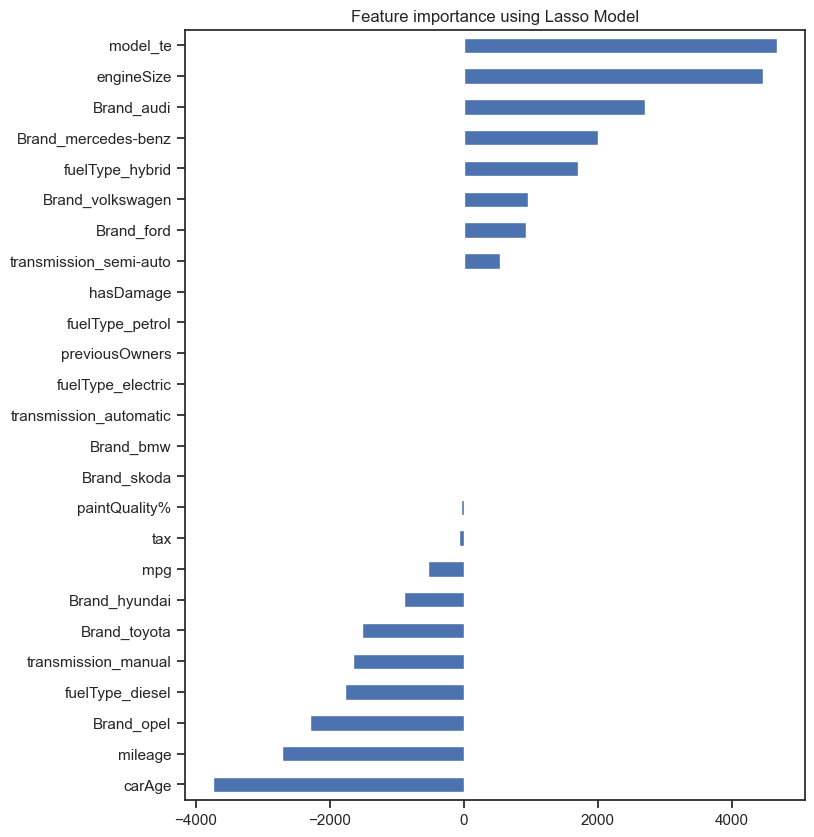

In [ ]:
plot_importance(coef,'Lasso')

In [ ]:
print(numeric, categ_features)

['mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners', 'carAge', 'model_te'] ['Brand_audi', 'Brand_bmw', 'Brand_ford', 'Brand_hyundai', 'Brand_mercedes-benz', 'Brand_opel', 'Brand_skoda', 'Brand_toyota', 'Brand_volkswagen', 'transmission_automatic', 'transmission_manual', 'transmission_semi-auto', 'fuelType_diesel', 'fuelType_electric', 'fuelType_hybrid', 'fuelType_petrol', 'hasDamage']


### 4.4 Final Features

| Predictor              | Spearman  | RFE RF | Lasso | Chi-Square | What to do? (One possible way to "solve") |
|-------------------------|-----------------|---------|-------|-------------|--------------------------------------------|
| model_te               | Keep      | Keep    | Keep  | -           | Keep|
| engineSize             | Choose between 'model_te' and 'engineSize'       | Keep    | Keep  | -    | Try with and without                                      |
| Brand_ford             | -      | Keep      | Keep     | Keep           | Keep                                          |
| fuelType_hybrid        | -      | Keep    | Keep  | Keep          | Keep                      |
| Brand_audi             | -          | Keep       | Keep    | Keep           | Keep                                          |
| transmission_semi-auto | -        | Keep    | Keep  | Keep          | Keep                    |
| Brand_volkswagen       | -      | Keep    | Keep  | Keep           | Keep                      |
| Brand_mercedes-benz    | -          | Keep       | Keep     | Keep           | Keep                                          |
| previousOwners         | Discard     | Keep | Discard | -        | Discard                      |
| paintQuality%          | Discard     | Keep   | Discard     | -        | Discard                      |
| hasDamage              | -      | Discard    | Discard     | -        | Discard                      |
| fuelType_electric      | -      | Keep    | Discard     | Discard        | Discard                      |
| transmission_automatic | -      | Keep    | Discard     | Keep        | Try with and without                      |
| fuelType_petrol        | -      | Keep    | Discard     | Keep        | Try with and without                      |
| Brand_hyundai          | -     | Keep       | Keep     | Keep           | Keep                                         |
| Brand_bmw              | -       | Keep       | Discard     | Keep           | Try with and without                                          |
| Brand_skoda            | -       | Keep       | Discard   | Discard           | Discard                                          |
| tax                    | Keep        | Keep    | Keep  | -     | Keep                                      |
| Brand_opel             | -    | Keep       | Keep  | Keep           | Keep                                          |
| Brand_toyota           | -    | Keep       | Keep  | Keep           | Keep                                          |
| mpg                    | Keep     | Keep | Keep  | -       | Keep                      |
| transmission_manual    | -      | Keep    | Keep | Keep        | Keep                      |
| fuelType_diesel        | -     | Keep    | Keep | Keep        | Keep                      |
| mileage                | Keep       | Keep    | Keep | -     | Keep               |
| carAge                 | Choose between 'carAge' and 'mileage'      | Keep    | Keep | -       | Try with and without                      |


Let's create a new list with the selected features

In [ ]:
cols_selected = ['mileage', 'tax', 'mpg', 'engineSize' , 'carAge', 'model_te','Brand_audi', 'Brand_bmw', 'Brand_ford', 'Brand_hyundai', 'Brand_mercedes-benz', 'Brand_opel',  'Brand_toyota', 'Brand_volkswagen', 'transmission_automatic', 'transmission_manual', 'transmission_semi-auto', 'fuelType_diesel',  'fuelType_hybrid', 'fuelType_petrol']